In [1]:
from __future__ import print_function
import numpy as np
import scipy.io as sio
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

np.random.seed(1337)  # for reproducibility

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# input image dimensions
img_rows, img_cols = 128, 128
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# Training data, shuffled and split
WB = np.array(sio.loadmat('sandstone_data.mat')['Data'])
Y_data = np.array(sio.loadmat('sandstone_data.mat')['L'])
Y_data = (Y_data-min(Y_data))/(max(Y_data)-min(Y_data))
X_data = np.reshape(WB,(768,img_rows*img_cols))


# Add 380 generated images using VAE+ST from Ruijin's code
WB_gen = np.array(sio.loadmat('generate_sandstone_data.mat')['Data'])
Y_gen = np.array(sio.loadmat('generate_sandstone_data.mat')['L'])
Y_gen = (Y_gen-min(Y_gen))/(max(Y_gen)-min(Y_gen))
# X_gen = np.transpose(np.reshape(WB_gen,(380,1,img_rows, img_cols)),[0,1,3,2])
X_gen = np.reshape(WB_gen,(380, img_rows*img_cols))


#Define Traing data and validation data
X_train = np.concatenate((X_data[0:700], X_gen[0:150], X_gen[230:380]), axis=0);
Y_train = np.concatenate((Y_data[0:700], Y_gen[0:150], Y_gen[230:380]), axis=0);
X_val = np.concatenate((X_data[700:768], X_gen[150:230]), axis=0);
Y_val = np.concatenate((Y_data[700:768], Y_gen[150:230]), axis=0);

WB1 = sio.loadmat('test_sandstone_data.mat')['Data']
X_test = np.reshape(WB1, (240, img_rows*img_cols))
Y_test = sio.loadmat('test_sandstone_data.mat')['L']
Y_test = (Y_test-min(Y_test))/(max(Y_test) - min(Y_test))    

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1000, 16384)
1000 train samples
148 validate samples
240 test samples


0.0162588491403


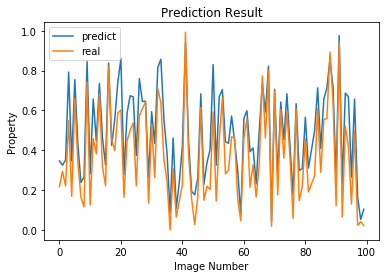

In [5]:
# Linear Regression

lire = LinearRegression()
lire.fit(X_train, Y_train)
pred = lire.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

print(mean_squared_error(Y_test, pred))